# <span> Laboratorio di Simulazione Numerica  </span>
## <span> Esercitazione 1 </span>
### Esercizio 1.1

L'obiettivo del primo esercizio è quello di verificare il corretto funzionamento del generatore di numeri pseudo-casuali, dato che verrà utilizzato nelle simulazioni delle successive esercitazioni. 
La prima verifica consiste nel calcolo dell'integrale $< r > = \int_0^1 r dr = 1/2$, ovvero il valor medio dei nostri numeri pseudo-casuali. L'integrale è stato calcolato numericamente tramite il metodo Monte-Carlo della media, cioè si calcola 

$$< r > \simeq \frac{1}{M} \sum_{i=1}^{M} r_i$$ 

dove $r_i$ è un numero distribuito uniformemente in $[0,1]$. Oltre alla stima dell'integrale è necessario specificare anche l'incertezza statistica su tale valore. Per fare ciò si utilizza il metodo del <b>data blocking</b>: si suddividono le $M$ variabili estratte in $N$ blocchi di lunghezza $L = M/N$; in ogni blocco viene calcolato il valor medio  $A_j = \frac{1}{L} \sum_{i=1}^{L} r_i$ (il pedice $j$ indica il blocco considerato), che diventa la nostra nuova variabile elementare. A questo punto la stima finale dell'integrale sarà il valor medio delle medie di blocco, mentre l'incertezza statistica è data dalla deviazione standard della media

$$\sigma_{< r>} = \frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$ 

Questo metodo viene utilizzato per eliminare eventuali correlazioni tra i numeri casuali estratti successivamente dal generatore. <br>
Sono state effettuate $M=10^6$ estrazioni divise in $N=200$ blocchi. Nel grafico sottostante viene stato raffigurata la differenza tra il valore numerico dell'integrale $<r>$, con la relativa incertezza statistica, e il valore atteso al variare del numero di blocchi. Nel caso di un solo blocco non è possibile calcolare l'incertezza, perciò viene posta uguale a 0.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import curve_fit

%config InlineBackend.figure_format = 'retina'

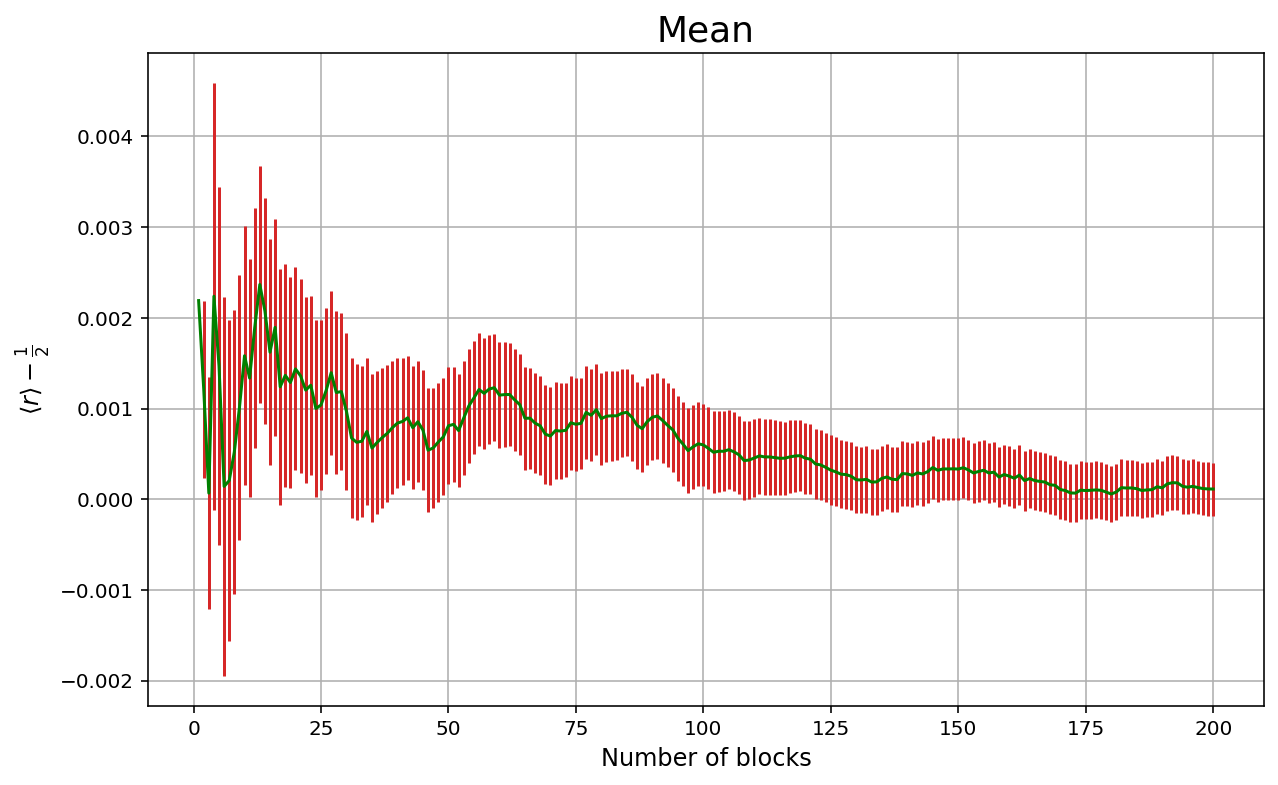

In [2]:
x, sum_prog, err_prog = np.loadtxt("1.1/media.out", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(10,6))
plt.errorbar(x, sum_prog-0.5, yerr=err_prog, color="green", ecolor="tab:red")
plt.xlabel(r'Number of blocks', fontsize=12)
plt.ylabel(r'$\langle r \rangle - \frac{{{1}}}{{2}}$', fontsize=12)
plt.title(f"Mean", fontsize=18)
plt.grid(True)
plt.show()

L'andamento progressivo della media di blocco ci permette di visualizzare la convergenza dell'algoritmo: dopo le fluttuazioni iniziali, il valore numerico finale converge al valore atteso entro una deviazione standard. Inoltre notiamo che l'incertezza diminuisce all'aumentare del numero dei blocchi: questo ce lo si poteva aspettare a causa del fattore $\sqrt{N-1}$ a denominatore nella deviazione standard della media. 

Come seconda verifica, sempre utilizzando il metodo del data blocking, calcoliamo la varianza dei nostri numeri pseudo-casuali, ovvero 

$$\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$$

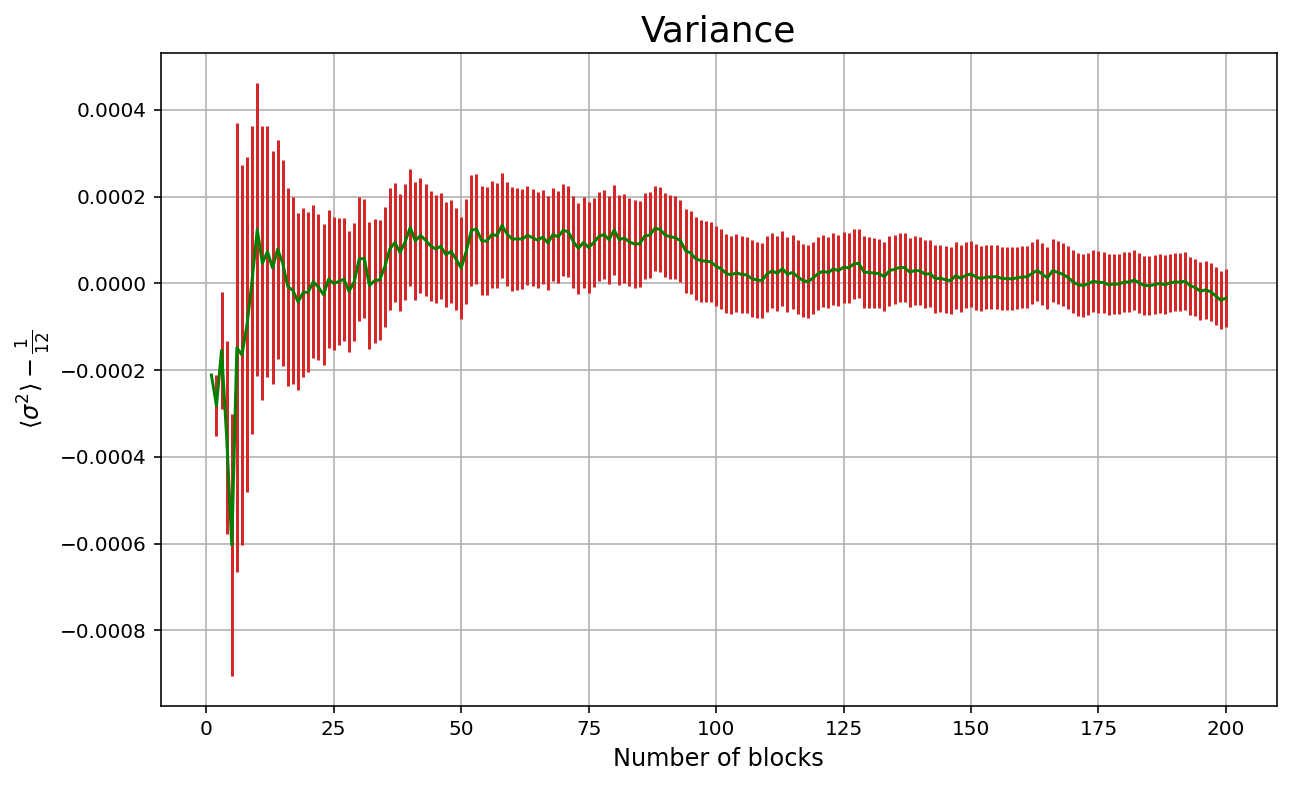

In [3]:
x, sum_prog, err_prog = np.loadtxt("1.1/varianza.out", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(10,6))
plt.errorbar(x,sum_prog-1/12,yerr=err_prog, color="green", ecolor="tab:red")
plt.xlabel(r'Number of blocks', fontsize=12)
plt.ylabel(r'$\langle \sigma^2\rangle - $' r'$\frac{{{1}}}{{12}}$', fontsize=12)
plt.title(f"Variance", fontsize=18)
plt.grid(True)
plt.show()

Anche in questo caso il valore numerico finale risulta compatibile con il valore atteso.
<br> <br>

**Test del $\chi^2$**

Da ultimo vogliamo verificare che i nostri numeri pseudo-casuali siano effettivamente distribuiti in maniera uniforme in $[0,1]$. Per raggiungere questo obiettivo effettuiamo il test del $\chi^2$: dividiamo l'intervallo $[0,1]$ in $M=100$ sottointervalli con la stessa larghezza e, detto $n$ il numero totale di variabili estratte, calcoliamo

$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$

dove $n_i$ è il numero di variabili estratte che si trovano nell'i-esimo sottointervallo, mentre $\frac{n}{M}$ è il numero di eventi attesi in ogni sottointervallo nell'ipotesi di numeri generati uniformemente. Si sceglie un campione $n=10^4$ numeri, per cui il valore atteso di $\chi^2$  è $100$. Il test viene eseguito $100$ volte e nello scatterplot sottostante sono riportati i risultati ottenuti. 

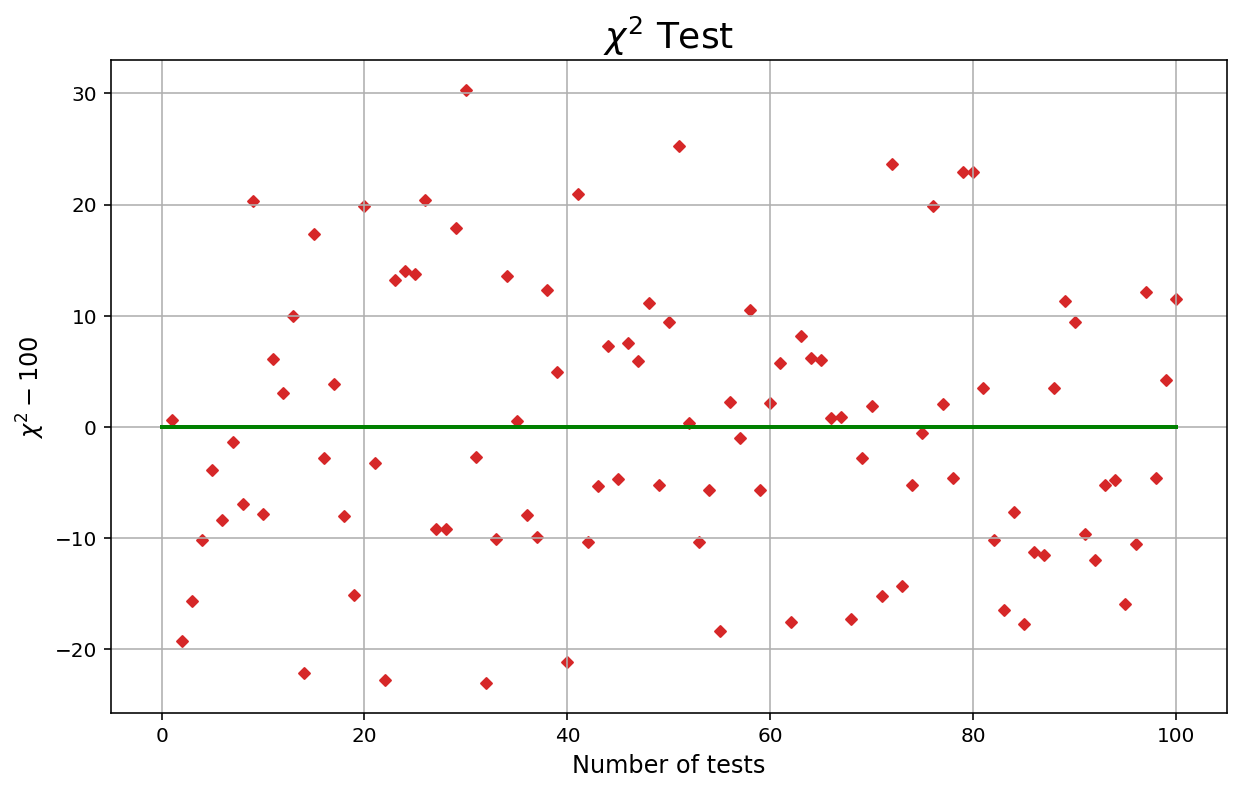

 mean = 99.7964


In [4]:
x, chi_quad = np.loadtxt("1.1/chi_quad.out", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure(figsize=(10,6))
plt.scatter(x, chi_quad-100, color='tab:red', marker='D', s=15)
plt.plot([0, 100], [0, 0], color='green', linewidth=2, label='Expected')
plt.grid(True)
plt.xlabel(r'Number of tests', fontsize=12)
plt.ylabel(r'$\chi^2 - 100$', fontsize=12)
plt.title(f'$\chi^2$ Test', fontsize=18)
plt.show()

print(f' mean = {np.mean(chi_quad)}')

Nonostante il valore medio del $\chi^2$ sia molto vicino al valore atteso, si può notare come molti valori siano in realtà lontanti da questo: un risultato si discosta più di $3\sigma$ dal valore atteso, mentre più del $10\%$ dei valori oltrepassa le $2\sigma$ di distanza. Quindi l'ipotesi che i numeri siano estratti da una distribuzione uniforme risulta improbabile. Infatti i numeri non sono veramente casuali, ma sono pseudo-casuali, in quanto vengono campionati attraverso un algoritmo deterministico.

### Esercizio 1.2

Una volta testato il generatore di numeri pseudo-casuali, ci poniamo l'obiettivo di verificare il <b>Teorema del Limite Centrale</b> (CLT). Nello specifico calcoliamo $S_N = \frac{1}{N} \sum_{i=1}^N x_i$, per $N=1, 2, 10, 100$, dove $x_i$ sono variabili identicamente distribuite. Per grandi valori di $N$ il valor medio $S_N$ tende a distribuirsi come una Gaussiana, a patto che le variabili siano statisticamente indipendenti e abbiano varianza finita. <br>
Sono state considerate tre diverse distribuzioni di probabilità per l'estrazione delle variabili $x_i$: <b>uniforme</b>, <b>esponenziale</b>, <b>Lorentziana</b> (o di Cauchy). Al fine di campionare le ultime due distribuzioni di probabilità è stato utilizzato il metodo dell'inversione della funzione cumulativa: 

- <span> Esponenziale: $p(x) = e^{-x}, \,\,\, x\in [0,+\infty] \,\,\, \rightarrow \,\,\, r = F(x) = 1-e^{-x} \,\,\, \rightarrow \,\,\, x = -\log(1-r)$ </span>
- <span> Lorentziana:  $\,\,\,  p(x) = \frac{1}{\pi} \frac{1}{1+x^2}, \,\,\, x\in [-\infty,+\infty] \,\, \,\rightarrow \,\,\, r = F(x) = \frac{1}{\pi} \tan^{-1}x + \frac{1}{2} \,\,\, \rightarrow \,\,\, x = \tan[\pi(r-\frac{1}{2})]$ </span>

In entrambi i casi $r$ è un numero casuale distribuito uniformemente in $[0,1]$.
    
Di seguito sono riportati gli istogrammi ottenuti a partire da $10^4$ realizzazioni di $S_N$ per i diversi valori di $N$ per ciascuna delle tre distribuzioni. Per $N=100$ è stato eseguito un fit dell'istogramma con la distribuzione limite.

In [5]:
unif_1, unif_2, unif_10, unif_100 = np.loadtxt("1.2/unif.out", usecols=(0,1,2,3), delimiter=' ', unpack='true')
exp_1, exp_2, exp_10, exp_100 = np.loadtxt("1.2/exp.out", usecols=(0,1,2,3), delimiter=' ', unpack='true')
cauchy_1, cauchy_2, cauchy_10, cauchy_100 = np.loadtxt("1.2/cauchy.out", usecols=(0,1,2,3), delimiter=' ', unpack='true')

In [6]:
def G(x,a,b,c):  # defining the fitting function - Gaussian
    return a * np.exp(-b*(x-c)**2)

def L(x, gamma, mean):  # defining the fitting function - Lorentzian
    return gamma/(np.pi*((x-mean)**2+gamma**2))

**Distribuzione Uniforme**

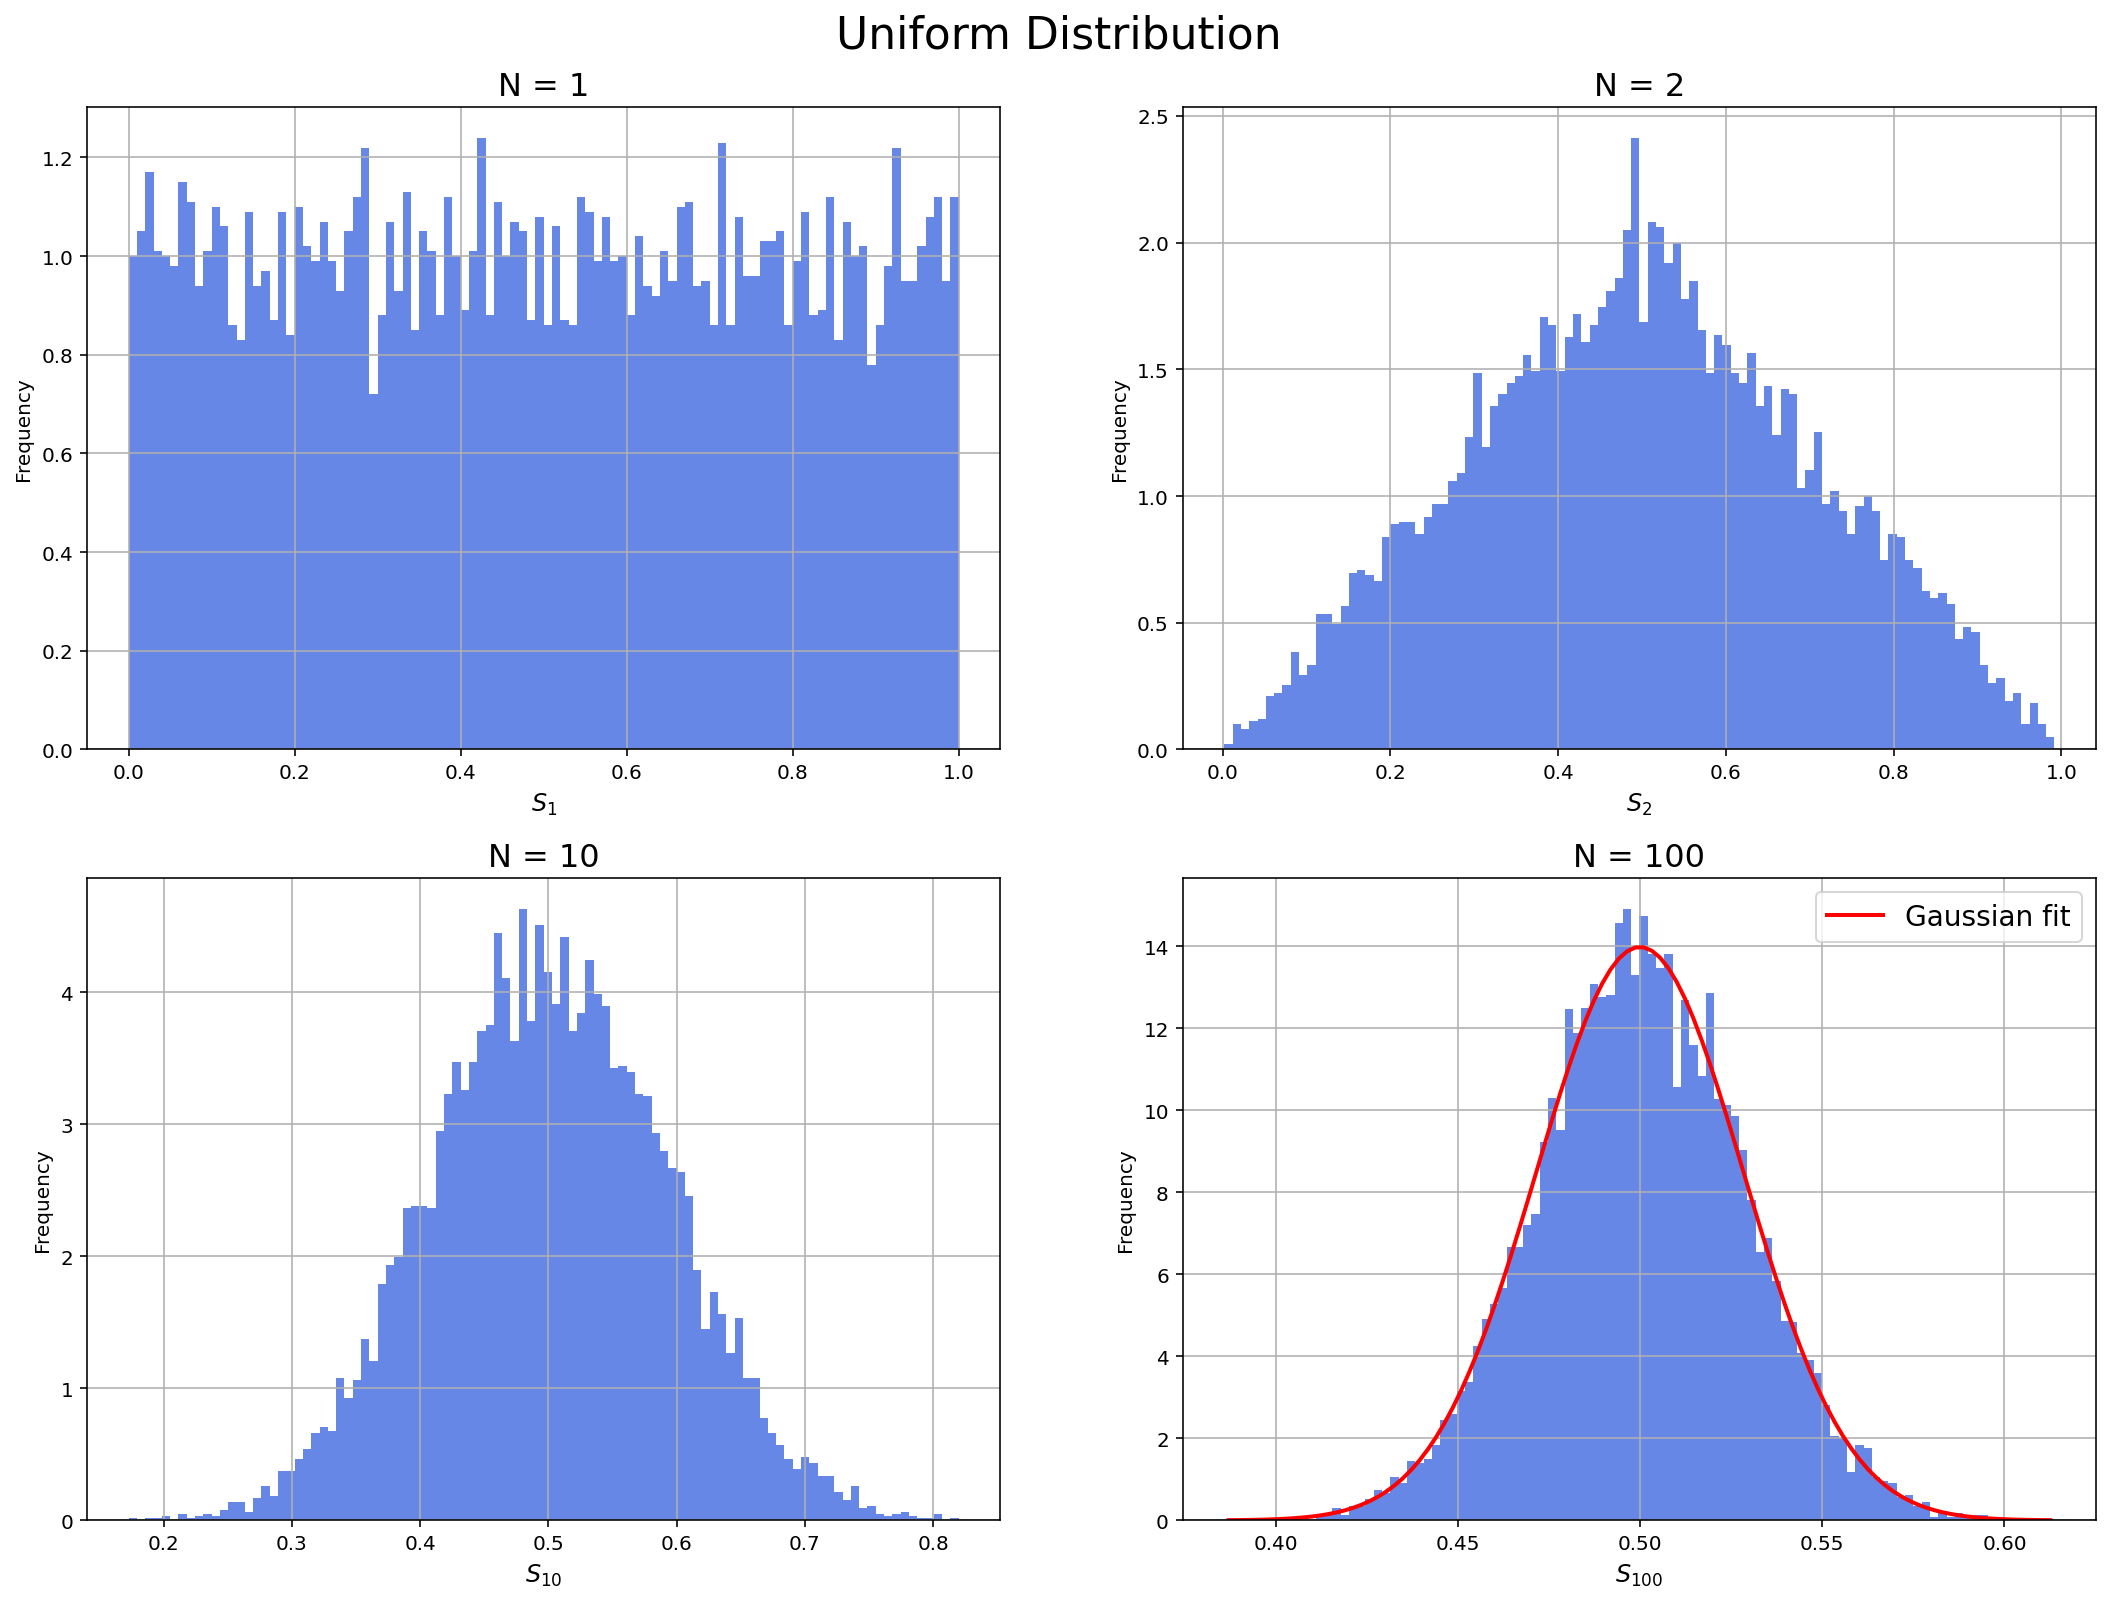

Parametri fit Gaussiano per N=100:
 mean = 0.4999 ± 0.0003
 sigma = 616 ± 13


In [7]:
n_bins = 100

# fit
hist_unif, bins_unif = np.histogram(unif_100, n_bins, density=True)  # density=True normalizza l'istogramma
# hist è un vettore con i valori dell'istogramma, bins è un vettore con i valori di inizio dei bins
valore = bins_unif[1] - bins_unif[0] 
bins_unif = bins_unif[:-1] + valore/2 

x = np.linspace(bins_unif[0],bins_unif[-1],100)

p_opt, p_cov = curve_fit(G, bins_unif, hist_unif)
y_fit_unif = G(x, p_opt[0], p_opt[1], p_opt[2])


# plot
fig, ax = plt.subplots(2, 2, figsize=(18, 13))
ax = ax.reshape(-1)

unif_list = [unif_1, unif_2, unif_10, unif_100]
N_list = [1, 2, 10, 100]

for i in range(4):
    ax[i].hist(unif_list[i], n_bins, density=True, color="royalblue", alpha=0.8)
    ax[i].set_xlabel(r'$S_{'f'{N_list[i]}'r'}$', fontsize=12)
    ax[i].set_ylabel(r'Frequency', fontsize=10)
    ax[i].set_title(f'N = {N_list[i]}', fontsize=16)
    ax[i].grid(True)
    
ax[3].plot(x, y_fit_unif, color="red", label = 'Gaussian fit', linewidth=2)
ax[3].legend(loc='upper right', fontsize=14)

fig.suptitle(f'Uniform Distribution', fontsize=22, y=0.93)

plt.show()

print("Parametri fit Gaussiano per N=100:")
print(" mean =", '{0:.4f}'.format(p_opt[2]), u"\u00B1", '{0:.4f}'.format(np.sqrt(np.diagonal(p_cov))[2]))
print(" sigma =", '{0:.0f}'.format(p_opt[1]), u"\u00B1", '{0:.0f}'.format(np.sqrt(np.diagonal(p_cov))[1]))

**Distribuzione Esponenziale**

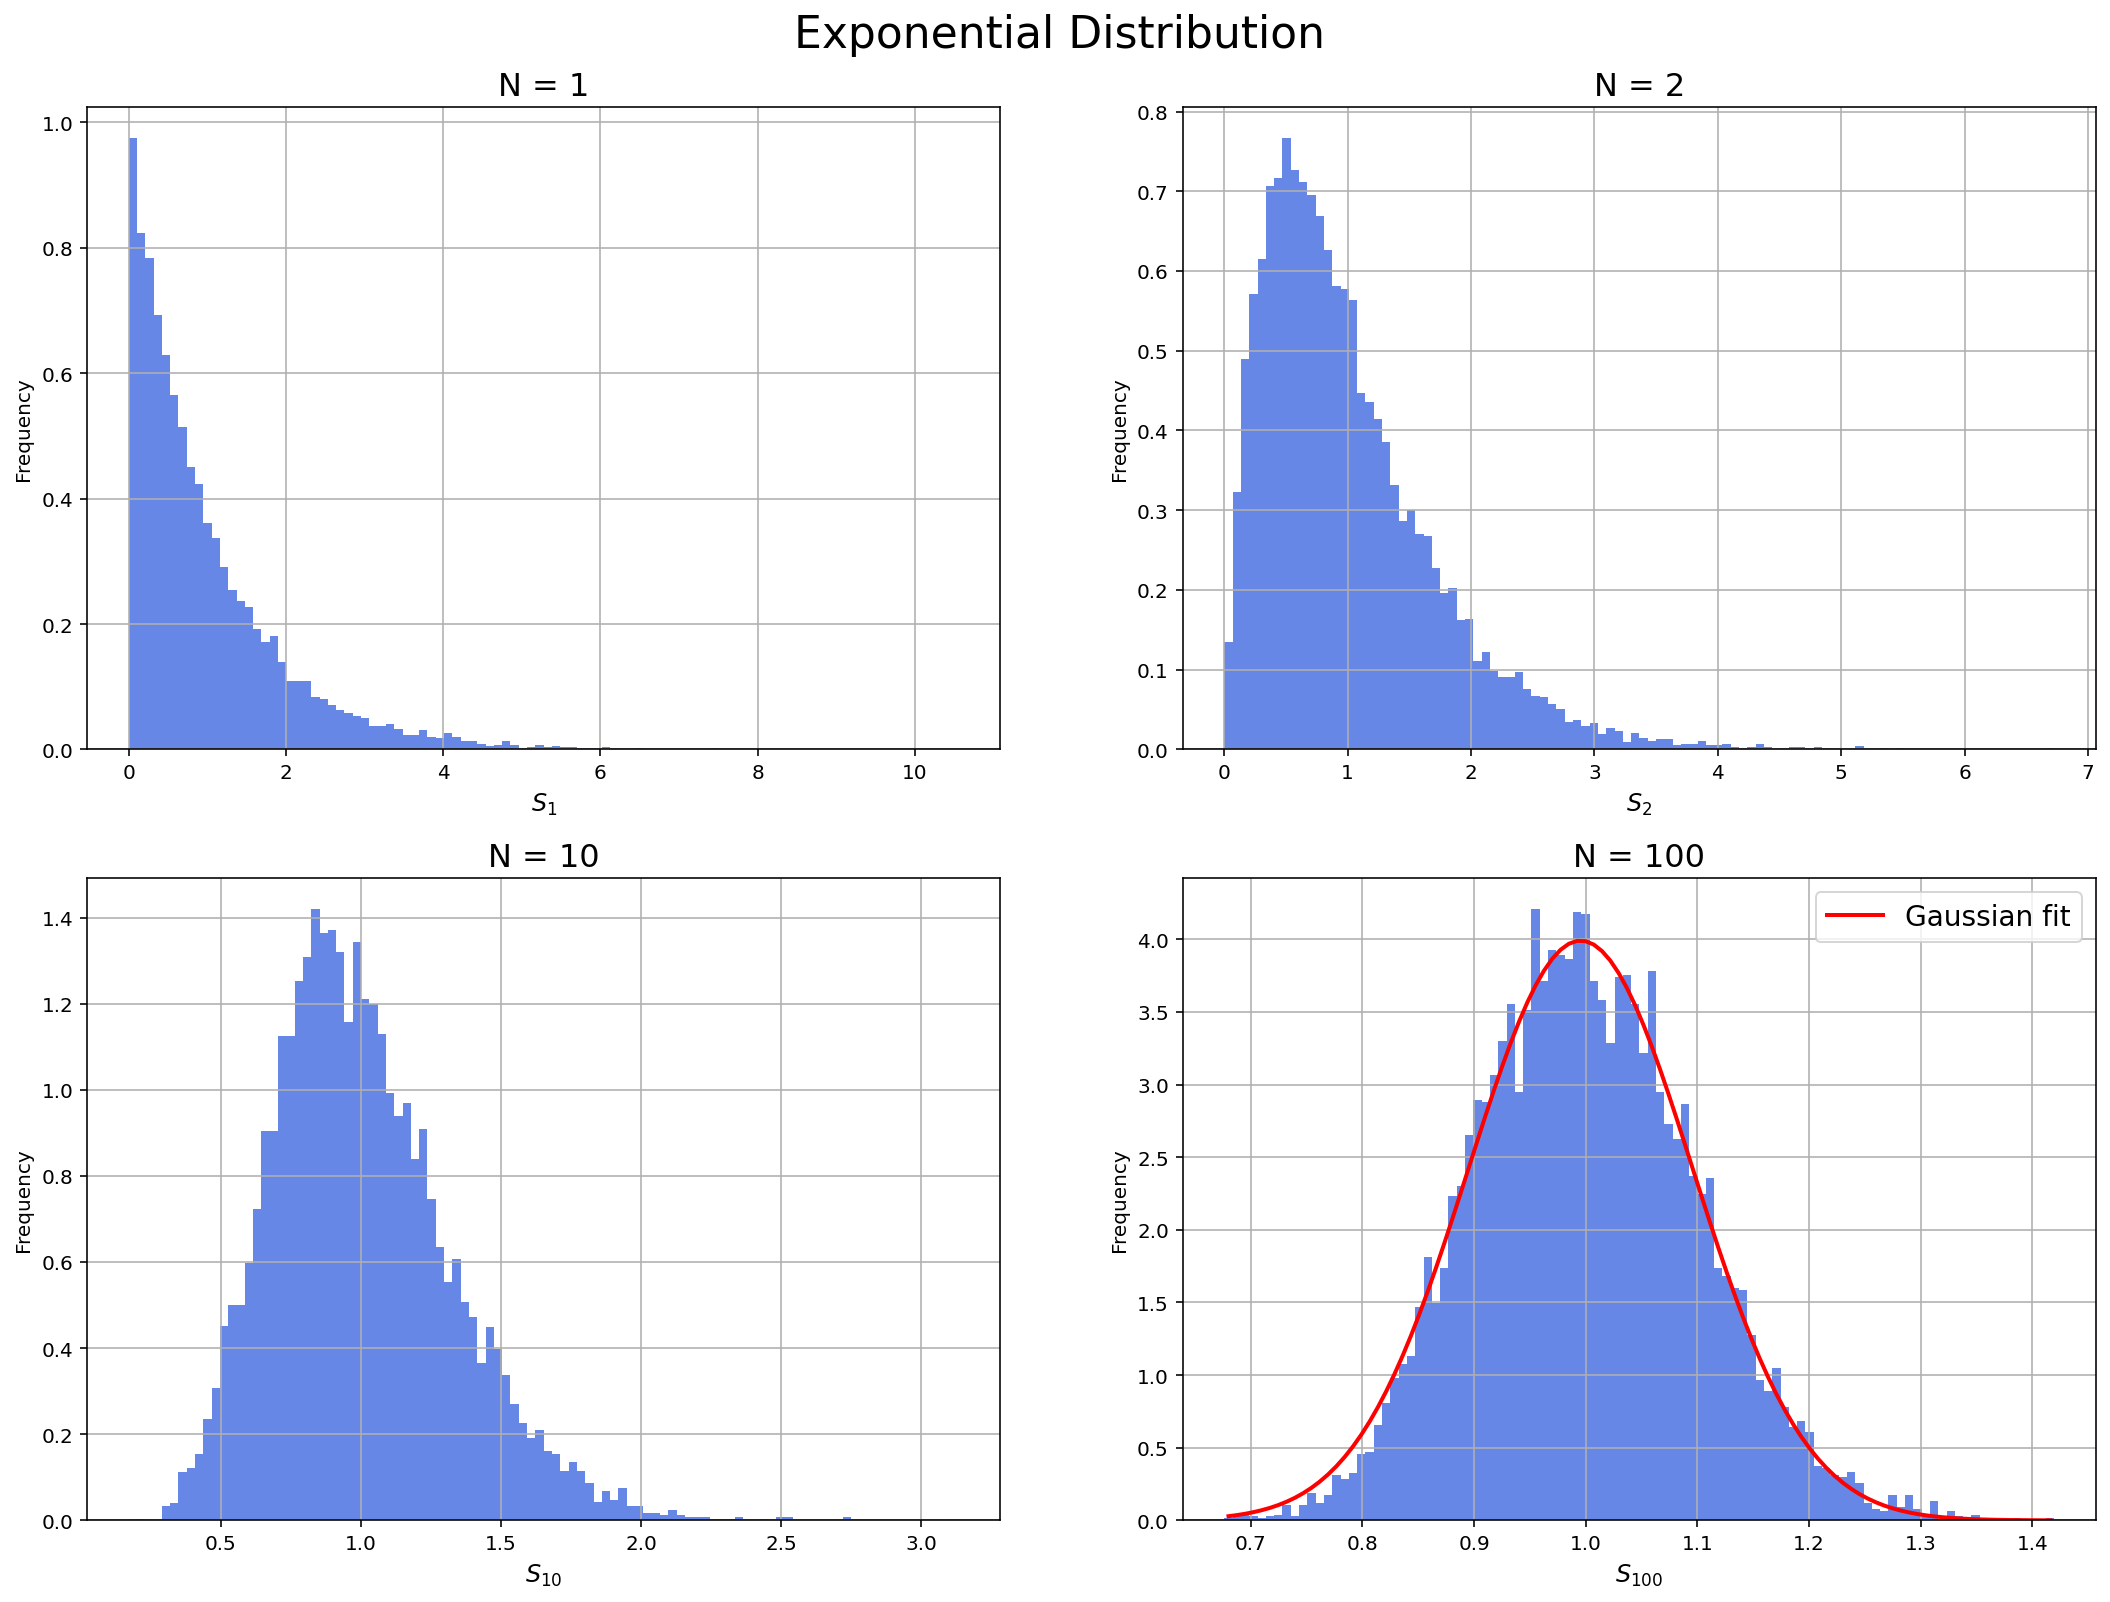

Parametri fit Gaussiano per N=100:
 mean = 0.9954 ± 0.0012
 sigma = 49.6 ± 1.2


In [8]:
# fit
hist_exp, bins_exp = np.histogram(exp_100, n_bins, density=True) 
valore = bins_exp[1] - bins_exp[0] 
bins_exp = bins_exp[:-1] + valore/2 

x = np.linspace(bins_exp[0],bins_exp[-1],100)

p_opt, p_cov = curve_fit(G, bins_exp, hist_exp)
y_fit_exp = G(x,p_opt[0],p_opt[1],p_opt[2])

# plot
fig, ax = plt.subplots(2, 2, figsize=(18, 13))
ax = ax.reshape(-1)

exp_list = [exp_1, exp_2, exp_10, exp_100]

for i in range(4):
    ax[i].hist(exp_list[i], n_bins, density=True, color="royalblue", alpha=0.8)
    ax[i].set_xlabel(r'$S_{'f'{N_list[i]}'r'}$', fontsize=12)
    ax[i].set_ylabel(r'Frequency', fontsize=10)
    ax[i].set_title(f'N = {N_list[i]}', fontsize=16)
    ax[i].grid(True)
    
ax[3].plot(x, y_fit_exp, color="red", label = 'Gaussian fit', linewidth=2)
ax[3].legend(loc='upper right', fontsize=14)

fig.suptitle(f'Exponential Distribution', fontsize=22, y=0.93)

plt.show()

print("Parametri fit Gaussiano per N=100:")
print(" mean =", '{0:.4f}'.format(p_opt[2]), u"\u00B1", '{0:.4f}'.format(np.sqrt(np.diagonal(p_cov))[2]))
print(" sigma =", '{0:.1f}'.format(p_opt[1]), u"\u00B1", '{0:.1f}'.format(np.sqrt(np.diagonal(p_cov))[1]))

**Distribuzione Lorentziana**

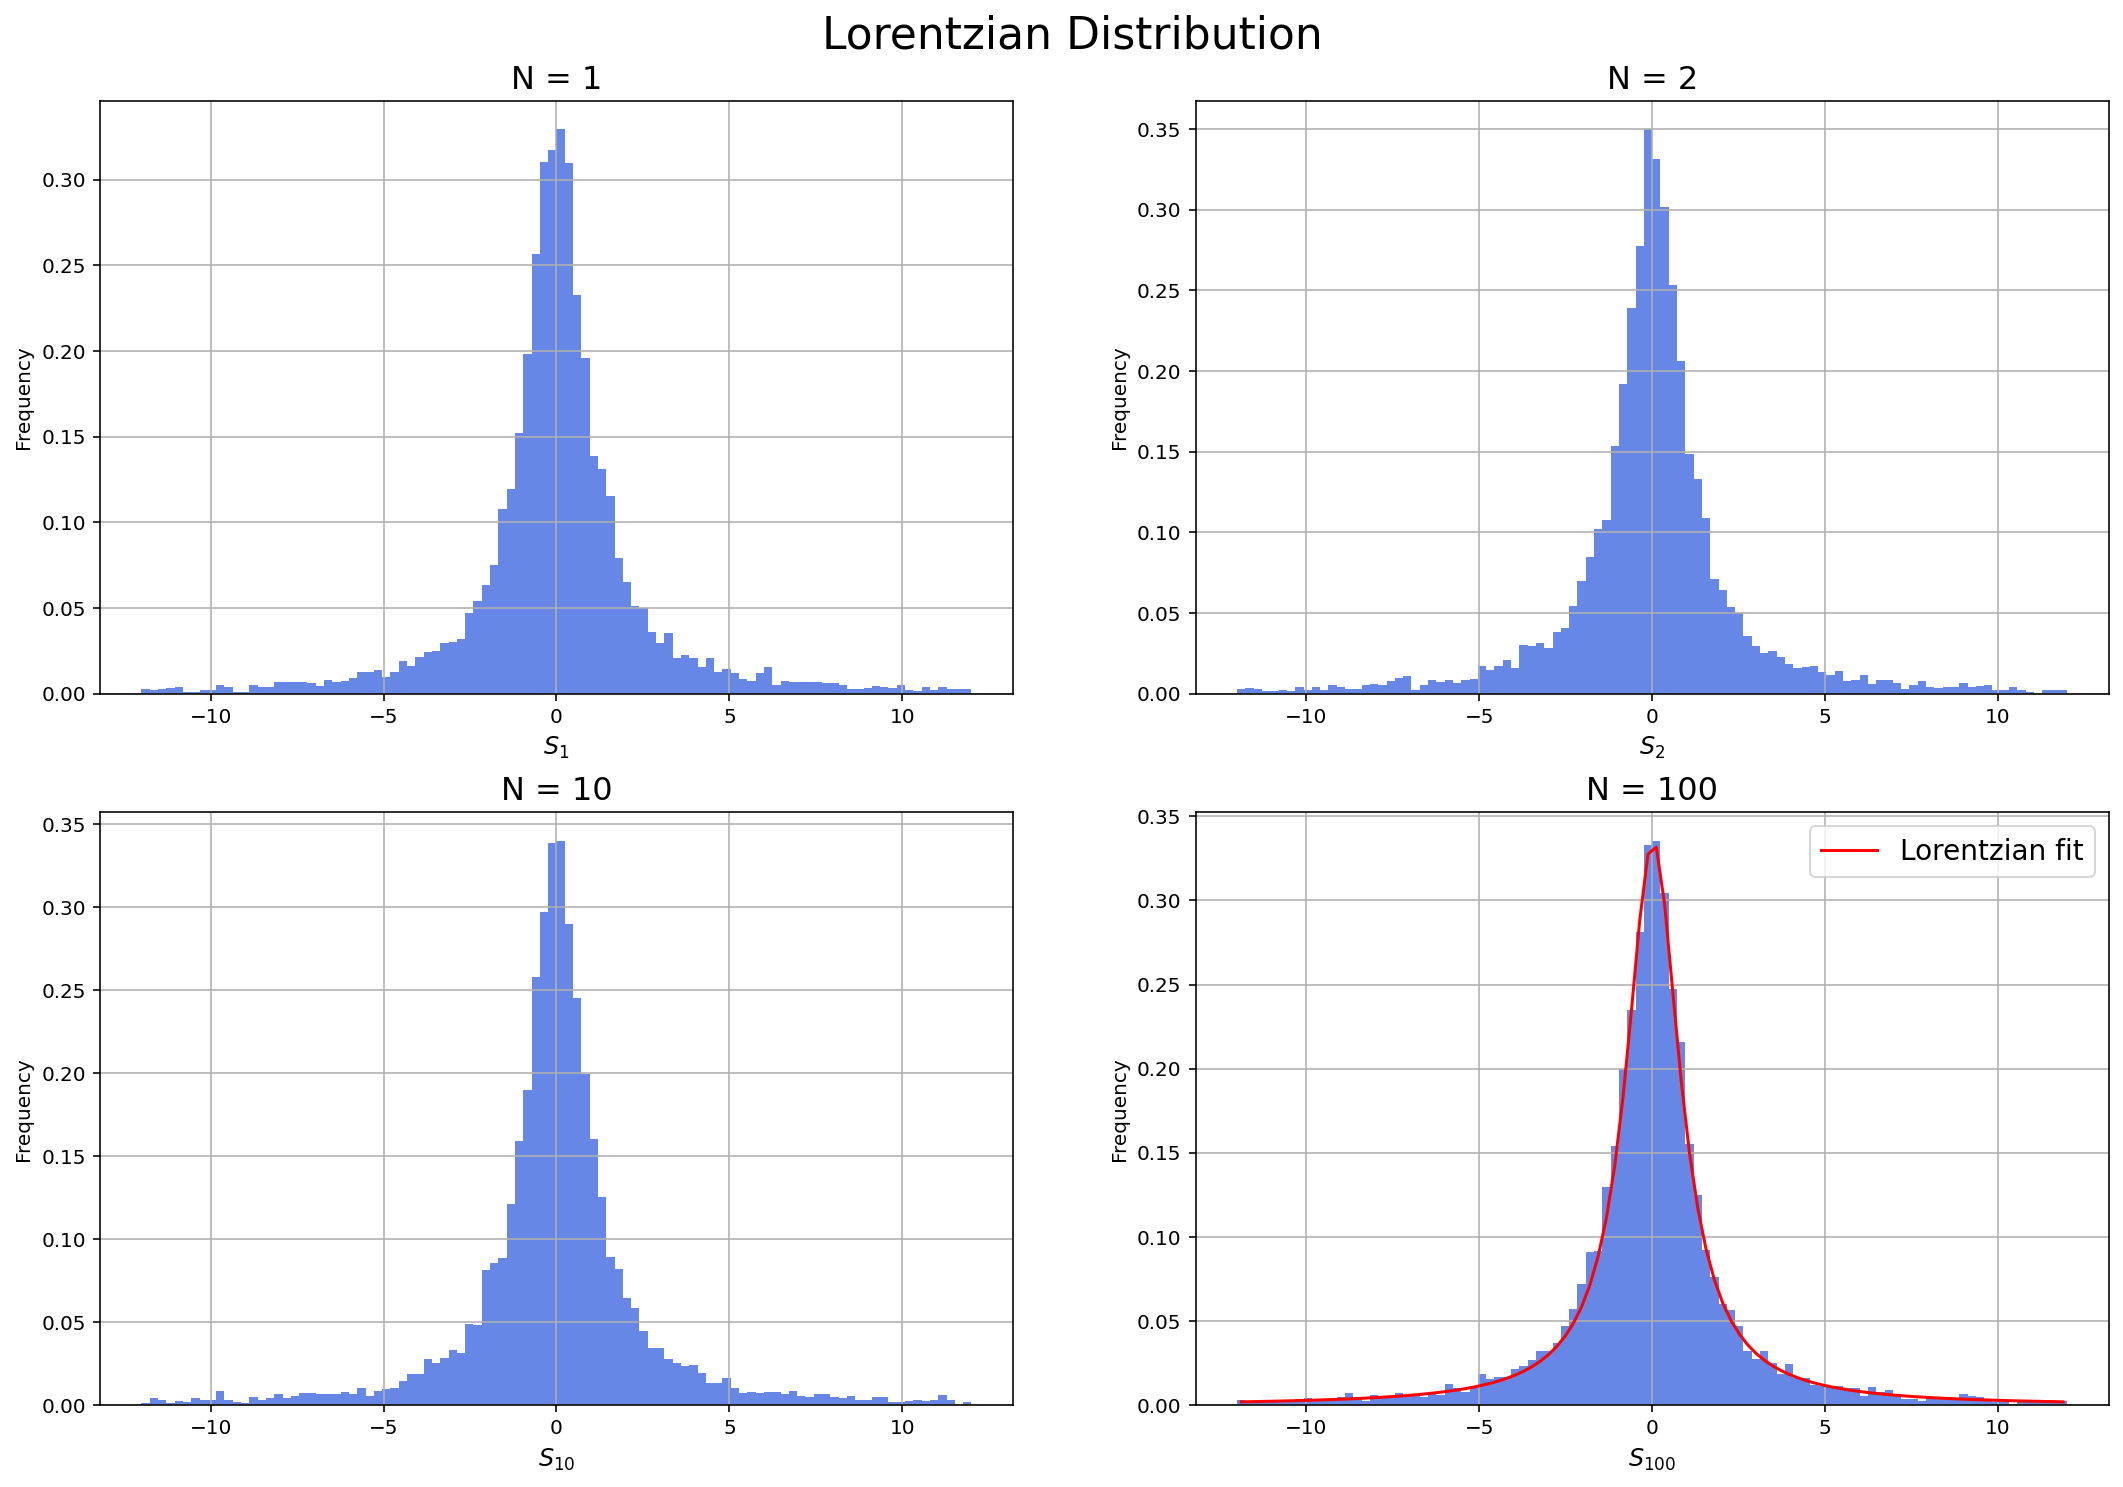

Parametri fit Lorentziano per N=100:
 mean = 0.024 ± 0.008
 gamma = 0.950 ± 0.008


In [9]:
# fit
hist_cauchy, bins_cauchy = np.histogram(cauchy_100, n_bins, range=(-12,12), density=True)
valore = bins_cauchy[1]-bins_cauchy[0] #se no prendo il valore del bin nel punto iniziale del bin e non in mezzo
bins_cauchy = bins_cauchy[:-1] + valore/2 #tolgo ultimo elemento

x = np.linspace(bins_cauchy[0],bins_cauchy[-1],100)

p_opt, p_cov = curve_fit(L, bins_cauchy, hist_cauchy)
y_fit_cauchy = L(x,p_opt[0],p_opt[1])

# plot
fig, ax = plt.subplots(2, 2, figsize=(18, 12))
ax = ax.reshape(-1)

cauchy_list = [cauchy_1, cauchy_2, cauchy_10, cauchy_100]

for i in range(4):
    ax[i].hist(cauchy_list[i], n_bins, density=True, range=(-12,12), color="royalblue", alpha=0.8)
    ax[i].set_xlabel(r'$S_{'f'{N_list[i]}'r'}$', fontsize=12)
    ax[i].set_ylabel(r'Frequency', fontsize=10)
    ax[i].set_title(f'N = {N_list[i]}', fontsize=16)
    ax[i].grid(True)
    
ax[3].plot(x, y_fit_cauchy, color="red", label = 'Lorentzian fit')
ax[3].legend(loc='upper right', fontsize=14)

fig.suptitle(f'Lorentzian Distribution', fontsize=22, y=0.93)

plt.show()

print("Parametri fit Lorentziano per N=100:")
print(" mean =", '{0:.3f}'.format(p_opt[1]), u"\u00B1", '{0:.3f}'.format(np.sqrt(np.diagonal(p_cov))[1]))
print(" gamma =", '{0:.3f}'.format(p_opt[0]), u"\u00B1", '{0:.3f}'.format(np.sqrt(np.diagonal(p_cov))[0]))

Osserviamo che, in accordo con il CLT, le distribuzioni uniforme ed esponenziale assumono progressivamente una forma Gaussiana al crescere di $N$, come si può notare dal fit eseguito. Al contrario, la distribuzione Lorentziana non approccia una Gaussiana, bensì la sua forma rimane inalterata: tale distribuzione quindi costituisce il bacino di attrazione di se stessa. Il motivo è che la distribuzione Lorentziana non ha varianza finita, pertanto le ipotesi del CLT non sono più soddisfatte. In quest'ultimo caso il fit è stato eseguito con una Lorentziana piuttosto che con una Gaussiana. 

### Esercizio 1.3

Lo scopo di questo ultimo esercizio è quello di simulare l'esperimento di Buffon per ottenere una stima di $\pi$. Immaginiamo di lanciare un ago di lunghezza $l$ su un piano orizzontale con linee parallele a distanza $d > l$. La probabilità che l'ago intersechi una di queste linee è $P = 2L/\pi d$ o, equivalentemente, è data dal rapporto tra il numero di volte $N_{hit}$ in cui l'ago intercetta la linea e il numero totale di lanci $N_{thr}$. Dal confronto tra le due espressioni per la probabilità si ottiene la seguente stima per $\pi$

$$\pi = \frac{2lN_{thr}}{N_{hit}d}$$ 

Per simulare l'esperimento di Buffon si sfrutta la simmetria del sistema sotto traslazione lungo l'asse $x$ ortogonale alle linee. Viene estratto un numero casuale in modo uniforme in $[0,d]$ che rappresenta la coordinata $x$ del centro dell'ago; successivamente viene estratto l'angolo compreso tra l'ago e le linee  in modo uniforme in $[0,\pi]$. Per generare quest'ultimo senza utilizzare esplicitamente $\pi$ (numero che in teoria non dovremmo conoscere!) generiamo un punto con coordinate $x \in [-1,1]$ e $y \in [0,1]$: se questo è tale che $\sqrt{x^2+y^2}<1$, allora si calcola l'angolo tramite la formula

$$\theta = \cos^{-1} \left( \frac{y}{\sqrt{x^2+y^2}} \right)$$

Se invece la sua distanza dall'origine è maggiore di $1$ vengono generati nuovi punti fino all'accettazione di uno di questi: questo passaggio è importante affinchè la distribuzione dell'angolo sia uniforme. Una volta noti la coordinata del centro e l'angolo, se questi due valori sono tali che valga la condizione

$$x+\frac{l}{2}\sin\theta \geq d \; \; \; \vee \; \; \; x-\frac{l}{2}\sin\theta \leq 0$$

allora l'ago interecetta una delle linee e viene incrementato $N_{hit}$, altrimenti si incrementa solamente $N_{thr}$.

Per stimare il valore di $\pi$ con la relativa incertezza è stato utilizzato il metodo del data blocking. Sono state eseguite $2\cdot 10^6$ estrazioni divise in $200$ blocchi. In ogni blocco si ottiene una sola stima di $\pi$ andando a contare quante volte l'ago interseca la linea (una estrazione è un lancio dell'ago). Si è scelto un ango di lunghezza $l=1.75$, mentre le linee sono state poste a distanza $d=2$. Di seguito riportiamo il valore numerico di $\pi$ al variare del numero di blocchi.

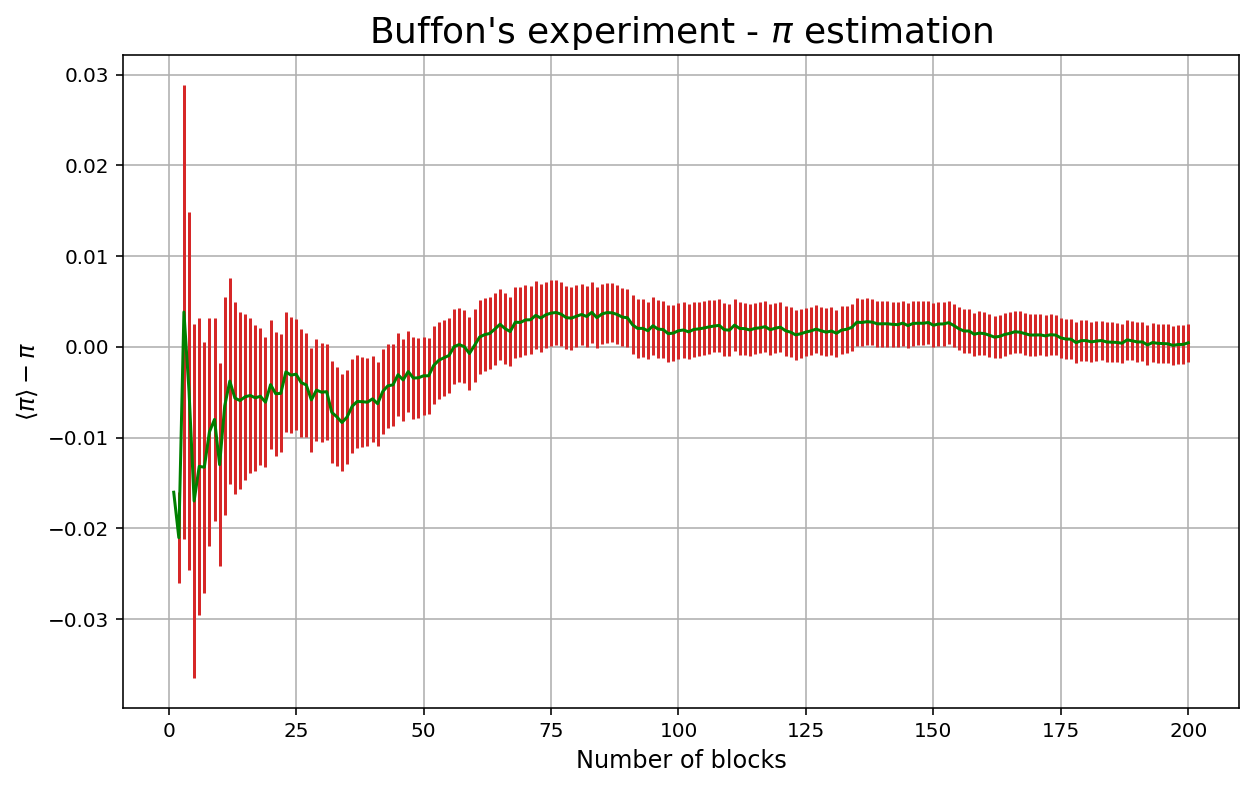

In [10]:
x, pi_prog, err_prog = np.loadtxt("1.3/pi.out", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(10,6))
plt.errorbar(x,pi_prog-np.pi,yerr=err_prog, color="green", ecolor="tab:red")
plt.xlabel(r'Number of blocks', fontsize=12)
plt.ylabel(r'$\langle\pi\rangle - \pi$', fontsize=12)
plt.title(f"Buffon's experiment - $\pi$ estimation", fontsize=18)
plt.grid(True)
plt.show()

Il valore numerico finale di $\pi$ risulta compatibile con il valore esatto. 